In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset
import statsmodels.discrete.discrete_model as sm
%matplotlib inline

In [2]:
df = pd.read_csv("data/churn_train.csv")

In [3]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [4]:
df.shape

(40000, 12)

In [5]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [6]:
current_date = max(df['last_trip_date'])

In [7]:
one_month_back = current_date-DateOffset(months=1)

In [8]:
df["label"] = df['last_trip_date']<one_month_back

In [9]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,label
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,True
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,True
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,True
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,True
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,True


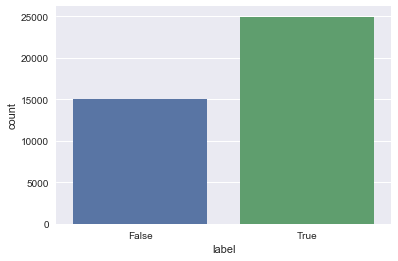

In [10]:
sns.countplot(df["label"])

In [11]:
df["label"].value_counts()

True     24968
False    15032
Name: label, dtype: int64

In [12]:
categories = ["city", "phone"]

In [13]:
for i in categories:
    print df[i].value_counts()

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64
iPhone     27628
Android    12053
Name: phone, dtype: int64


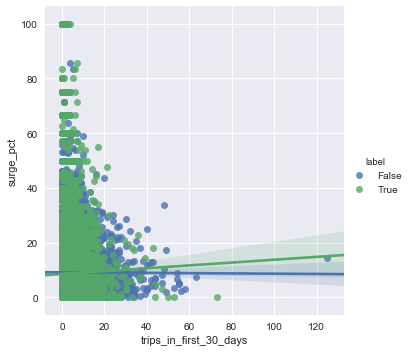

In [14]:
sns.lmplot("trips_in_first_30_days", "surge_pct", df, hue = "label")

In [15]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                      319
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
label                        0
dtype: int64

In [16]:
not_null = df.avg_rating_of_driver.isnull()==False
null = df.avg_rating_of_driver.isnull()==True

In [17]:
#df['avg_rating_of_driver_imputed'] = df.avg_rating_of_driver.isnull()

df.head()
mode = df.avg_rating_of_driver[not_null].mode()
median = df.avg_rating_of_driver[not_null].median()

In [18]:
df.loc[null,'avg_rating_of_driver'] = 1.0

In [19]:
not_null_by_driver = df.avg_rating_by_driver.isnull()==False
null_by_driver = df.avg_rating_by_driver.isnull()==True

#df['avg_rating_by_driver_imputed'] = df.avg_rating_by_driver.isnull()

df.head()
mode1 = df.avg_rating_by_driver[not_null].mode()
median1 = df.avg_rating_by_driver[not_null].median()

df.loc[null_by_driver,'avg_rating_by_driver'] = 1.0


In [20]:
not_null_phone = df.phone.isnull()==False
null_phone = df.phone.isnull()==True

#df['avg_rating_phone_imputed'] = df.phone.isnull()

df.loc[null_phone,'phone'] = 'other'

In [21]:
df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
luxury_car_user           0
weekday_pct               0
label                     0
dtype: int64

In [22]:
def rating(i):
    if i >= 4 :
        return "high"
    else:
        return "low"
            

In [23]:
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].apply(rating)
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].apply(rating)

In [24]:
df.signup_date = pd.to_datetime(df['signup_date'])

In [25]:
df['time_as_user'] = one_month_back - df.signup_date
df['time_as_user'] = df.time_as_user.dt.days

In [26]:
def boolean_int(i):
    if i == False:
        return 0
    else:
        return 1

In [27]:
df["luxury_car_user"] = df["luxury_car_user"].apply(boolean_int)

In [28]:
df_1 = df.copy()

In [29]:
categories = ["city", "phone", "avg_rating_of_driver", "avg_rating_by_driver"]

In [30]:
for i in categories:
    x = pd.get_dummies(df_1[i], drop_first = True, prefix = str(i)+"_")
    df_1 = pd.concat([df_1, x],axis=1)
    

In [31]:
df_1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,label,time_as_user,city__King's Landing,city__Winterfell,phone__iPhone,phone__other,avg_rating_of_driver__low,avg_rating_by_driver__low
0,6.94,high,high,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,True,140,0,0,0,0,0,0
1,8.06,high,high,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,1,0.0,True,127,0,0,0,0,0,0
2,21.50,high,low,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,1,100.0,True,150,0,1,1,0,1,0
3,9.46,high,low,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,0,100.0,True,143,0,1,0,0,1,0
4,13.77,high,low,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,0,100.0,True,121,0,1,1,0,1,0


In [32]:
result_df = df_1.copy()

In [33]:
result_df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'label', u'time_as_user', u'city__King's Landing',
       u'city__Winterfell', u'phone__iPhone', u'phone__other',
       u'avg_rating_of_driver__low', u'avg_rating_by_driver__low'],
      dtype='object')

In [34]:
features = ["avg_dist",
       "avg_surge",
       "surge_pct", "trips_in_first_30_days", "luxury_car_user",
       "weekday_pct", "city__King's Landing", "city__Winterfell",
       "phone__iPhone", "phone__other", "avg_rating_of_driver__low",
       "avg_rating_by_driver__low", "time_as_user"]

In [35]:
result_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                     40000 non-null float64
avg_surge                    40000 non-null float64
surge_pct                    40000 non-null float64
trips_in_first_30_days       40000 non-null int64
luxury_car_user              40000 non-null int64
weekday_pct                  40000 non-null float64
city__King's Landing         40000 non-null uint8
city__Winterfell             40000 non-null uint8
phone__iPhone                40000 non-null uint8
phone__other                 40000 non-null uint8
avg_rating_of_driver__low    40000 non-null uint8
avg_rating_by_driver__low    40000 non-null uint8
time_as_user                 40000 non-null int64
dtypes: float64(4), int64(3), uint8(6)
memory usage: 2.4 MB


In [36]:
y = result_df.pop("label")
X = result_df[features]

In [37]:
logit = sm.Logit(y, X)

In [38]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.555427
         Iterations 6


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39987
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Sep 2017   Pseudo R-squ.:                  0.1609
Time:                        10:22:31   Log-Likelihood:                -22217.
converged:                       True   LL-Null:                       -26479.
                                        LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
avg_dist                      0.0384      0.002     16.368      0.000       0.034       0.043
avg_surge                     0.7908      0.092      8.567      0.000       0.610       0.972
surge_pct                    -0.0083      0.001     -8.688      0.000      -0.010      -0.006
trips_in_first_30_days       -0.1090      0.004    -28.349      0.000      -0.117      -0.101
luxury_car_user              -0.8645      0.024    -36.151      0.000      -0.911      -0.818
weekday_pct                   0.0008      0.000      2.533      0.011       0.000       0.001
city__King's Landing         -1.6675      0.033    -50.625      0.000      -1.732      -1.603
city__Winterfell             -0.5359      0.027    -19.687      0.000      -0.589      -0.483
phone__iPhone                -1.0689      0.027    -39.108      0.000      -1.122      -1.015
phone__other                 -0.2764      0.134     -2.058      0.040      -0.540      -0.013
avg_rating_of_driver__low     0.3830      0.029     13.419      0.000       0.327       0.439
avg_rating_by_driver__low     0.5541      0.071      7.810      0.000       0.415       0.693
time_as_user                  0.0099      0.001     13.953      0.000       0.009       0.011
=============================================================================================
"""

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_curve

In [43]:
logit = sm.Logit(y_train, X_train)

In [44]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.555188
         Iterations 6


In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                28000
Model:                          Logit   Df Residuals:                    27987
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Sep 2017   Pseudo R-squ.:                  0.1616
Time:                        10:22:32   Log-Likelihood:                -15545.
converged:                       True   LL-Null:                       -18541.
                                        LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
avg_dist                      0.0372      0.003     13.372      0.000       0.032       0.043
avg_surge                     0.7255      0.108      6.705      0.000       0.513       0.938
surge_pct                    -0.0079      0.001     -6.949      0.000      -0.010      -0.006
trips_in_first_30_days       -0.1102      0.005    -23.701      0.000      -0.119      -0.101
luxury_car_user              -0.8555      0.029    -29.891      0.000      -0.912      -0.799
weekday_pct                   0.0007      0.000      1.734      0.083   -8.64e-05       0.001
city__King's Landing         -1.6859      0.039    -42.733      0.000      -1.763      -1.609
city__Winterfell             -0.5351      0.033    -16.443      0.000      -0.599      -0.471
phone__iPhone                -1.0813      0.033    -33.054      0.000      -1.145      -1.017
phone__other                 -0.3653      0.158     -2.308      0.021      -0.675      -0.055
avg_rating_of_driver__low     0.3665      0.034     10.789      0.000       0.300       0.433
avg_rating_by_driver__low     0.5894      0.085      6.922      0.000       0.423       0.756
time_as_user                  0.0106      0.001     12.639      0.000       0.009       0.012
=============================================================================================
"""

In [46]:
featuresIwant = ["avg_dist", "weekday_pct", "avg_rating_by_driver__low", "surge_pct", "trips_in_first_30_days"]

In [47]:
X_train_new = X_train[featuresIwant]

In [48]:
logit_new = sm.Logit(y_train, X_train_new)

In [49]:
result_new = logit_new.fit()

Optimization terminated successfully.
         Current function value: 0.642656
         Iterations 5


In [50]:
result_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                28000
Model:                          Logit   Df Residuals:                    27995
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Sep 2017   Pseudo R-squ.:                 0.02946
Time:                        10:22:32   Log-Likelihood:                -17994.
converged:                       True   LL-Null:                       -18541.
                                        LLR p-value:                3.480e-235
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
avg_dist                      0.0525      0.002     22.009      0.000       0.048       0.057
weekday_pct                   0.0046      0.000     17.563      0.000       0.004       0.005
avg_rating_by_driver__low     0.9209      0.080     11.583      0.000       0.765       1.077
surge_pct                     0.0040      0.001      6.538      0.000       0.003       0.005
trips_in_first_30_days       -0.1021      0.004    -26.014      0.000      -0.110      -0.094
=============================================================================================
"""

In [51]:
y_pred = result.predict(X_test)
y_pred_new = result_new.predict(X_test[featuresIwant])

In [52]:
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_new, pos_label=None, sample_weight=None, drop_intermediate=True)

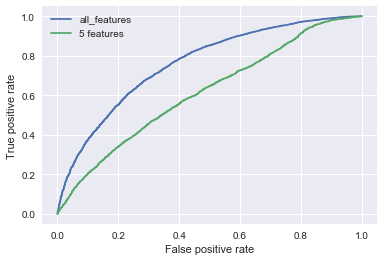

In [53]:
plt.plot(fpr, tpr, label = "all_features")
plt.plot(fpr1, tpr1, label = "5 features")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

In [54]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,label,time_as_user
0,6.94,high,high,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,True,140
1,8.06,high,high,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,1,0.0,True,127
2,21.50,high,low,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,1,100.0,True,150
3,9.46,high,low,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,0,100.0,True,143
4,13.77,high,low,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,0,100.0,True,121


In [55]:
df_2 = df.copy()

In [56]:
for i in categories:
    x = pd.get_dummies(df_2[i], prefix = str(i)+"_")
    df_2 = pd.concat([df_2, x],axis=1)

In [57]:
rf_df = df_2.copy()

In [58]:
rf_df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'label', u'time_as_user', u'city__Astapor',
       u'city__King's Landing', u'city__Winterfell', u'phone__Android',
       u'phone__iPhone', u'phone__other', u'avg_rating_of_driver__high',
       u'avg_rating_of_driver__low', u'avg_rating_by_driver__high',
       u'avg_rating_by_driver__low'],
      dtype='object')

In [59]:
features = [u'avg_dist',
       u'avg_surge',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'city__Astapor', "city__King's Landing",
       u'city__Winterfell', u'phone__Android', u'phone__iPhone',
       u'phone__other', u'avg_rating_of_driver__high',
       u'avg_rating_of_driver__low', u'avg_rating_by_driver__high',
       u'avg_rating_by_driver__low']

In [60]:
rf_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
avg_dist                      40000 non-null float64
avg_surge                     40000 non-null float64
surge_pct                     40000 non-null float64
trips_in_first_30_days        40000 non-null int64
luxury_car_user               40000 non-null int64
weekday_pct                   40000 non-null float64
city__Astapor                 40000 non-null uint8
city__King's Landing          40000 non-null uint8
city__Winterfell              40000 non-null uint8
phone__Android                40000 non-null uint8
phone__iPhone                 40000 non-null uint8
phone__other                  40000 non-null uint8
avg_rating_of_driver__high    40000 non-null uint8
avg_rating_of_driver__low     40000 non-null uint8
avg_rating_by_driver__high    40000 non-null uint8
avg_rating_by_driver__low     40000 non-null uint8
dtypes: float64(4), int64(2), uint8(10)
memory usage: 2.2 MB


In [61]:
y_rf = rf_df.pop("label").values
X_rf = rf_df[features].values

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_rf, y_rf, train_size = 0.7)

In [63]:
y_rf.shape

(40000,)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [66]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
predictions = rf.predict(Xtest)

In [68]:
ytest.shape

(12000,)

In [69]:
imp_features = rf.feature_importances_

In [70]:
importance_list= pd.DataFrame(imp_features, index=features, columns = ["rel_importance"])
#importance_list.rename(columns={0: "relative_importances"})
importance_list.reset_index()

,index,rel_importance
0,avg_dist,0.383023
1,avg_surge,0.081292
2,surge_pct,0.103888
3,trips_in_first_30_days,0.090605
4,luxury_car_user,0.036613
5,weekday_pct,0.173710
6,city__Astapor,0.015775
7,city__King's Landing,0.045640
8,city__Winterfell,0.010034
9,phone__Android,0.018935


In [71]:
importance_list.sort_values("rel_importance", ascending = False, inplace=True)

In [72]:
importance_list.reset_index()

,index,rel_importance
0,avg_dist,0.383023
1,weekday_pct,0.173710
2,surge_pct,0.103888
3,trips_in_first_30_days,0.090605
4,avg_surge,0.081292
5,city__King's Landing,0.045640
6,luxury_car_user,0.036613
7,phone__iPhone,0.021426
8,phone__Android,0.018935
9,city__Astapor,0.015775


In [73]:
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_new, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr2, tpr2, threshold2 = roc_curve(ytest, predictions, pos_label=None, sample_weight=None, drop_intermediate=True)

In [74]:
fpr2.shape

(3,)

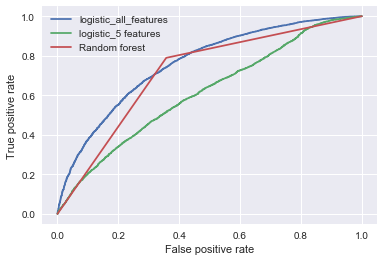

In [75]:
plt.plot(fpr, tpr, label = "logistic_all_features")
plt.plot(fpr1, tpr1, label = "logistic_5 features")
plt.plot(fpr2, tpr2, label = "Random forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

In [76]:
ytest.shape

(12000,)